In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

In [2]:
life=pd.read_csv("Life Expectancy Data.csv")
life.columns=['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', ' BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria','HIV/AIDS', 'GDP', 'Population',
       'Thinness  1-19 years', 'Thinness 5-9 years',
       'Income composition of resources', 'Schooling']
life

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imputedData=imp_median.fit_transform(life[['Life Expectancy','Alcohol','Hepatitis B','Polio','Diphtheria']])
life[['Life Expectancy','Alcohol','Hepatitis B','Polio','Diphtheria']]=imputedData
print(life.isna().sum())

Country                              0
Year                                 0
Status                               0
Life Expectancy                      0
Adult Mortality                     10
Infant Deaths                        0
Alcohol                              0
Percentage Expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                34
Under-Five Deaths                    0
Polio                                0
Total Expenditure                  226
Diphtheria                           0
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness  1-19 years                34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [4]:
def LinearStochasticDescent(x,y,Constants,learningRate,Lambda):
    X_train,X_valid,y_train,y_valid=train_test_split(x, y, test_size=0.1, random_state=42)
    size=X_train.shape[0]
    out=y_train.values.tolist()
    validationMSE=0
    length=len(X.columns)
    delta=np.zeros(length+1)
    iterations=0
    indice=0
    currentMSE=0
    trainingMSEs=[]
    validationMSEs=[]
    Dummy_delta=[]
    All_Delta=[]
    All_Constants=[]
    All_lr=[]
    validationMSEs.append(LinearPrediction(X_valid,y_valid,Constants,Lambda))
    previousMSE=np.inf
    while (previousMSE-currentMSE>=0.01 or iterations<5) and (iterations<=300):
        slopes=Constants[:length]
        c=Constants[length]
        Ypred=X_train.apply(lambda x: np.sum(np.multiply(x,slopes))+c,axis=1)
        diff=np.subtract(Ypred,out).tolist()
        diff=np.asarray(diff)
        trainingMSE=(diff**2).sum()/size
        trainingMSEs.append(trainingMSE)
        delta[:length]=(2*(X_train.iloc[indice].values)*(diff[indice])).tolist()
        delta[:length] = list(np.array(delta[:length]) + 2 * Lambda * np.array(delta[:length]))
        delta[length]=2*(diff[indice])
        All_Delta.append(delta.copy())
        prevConstants=Constants
        Constants=Constants-delta*learningRate
        All_Constants.append(Constants.copy())

        validationMSE=LinearPrediction(X_valid,y_valid,Constants,Lambda)
        iterations+=1
        indice=(indice+1)%X_train.shape[0]
        validationMSEs.append(validationMSE)
        if iterations<5:
            pass
        else:
            LatestFiveMSEs=validationMSEs[iterations-5:iterations]
            previousMSE=max(LatestFiveMSEs)

            # previousMSE=max(LatestFiveMSEs)
            currentMSE=min(LatestFiveMSEs)
            previd=''
            currentid=''
            for i in range(len(LatestFiveMSEs)):
                if LatestFiveMSEs[i]==currentMSE:
                    currentid=i-1
                elif LatestFiveMSEs[i]==previousMSE:
                    previd=i-1
            print("The iteration "+str(iterations))
            num=np.linalg.norm(np.array(All_Delta[currentid]) - np.array(All_Delta[previd]))
            den=np.linalg.norm(np.array(All_Constants[currentid]) - np.array(All_Constants[previd]))
            L=num/den
            print("The Lipsthiz factor is "+str(L))
            learningRate = min(learningRate,1/L)
            print("The learning rate is "+str(learningRate))
        # if True in [iterations==(X_train.shape[0]-1)*i for i in range(0,11)]:
        #     indice=0
        All_lr.append(learningRate)
    return trainingMSEs,validationMSEs,prevConstants,iterations,All_lr,All_Constants

def LinearPrediction(X,y,Constants,Lambda):
    out=y.values
    length=len(X.columns)
    slopes=Constants[:length]
    c=Constants[length]
    size=X.shape[0]
    Ypred=X.apply(lambda x: np.sum(np.multiply(x,slopes))+c,axis=1)
    MSE=(((Ypred-out)**2).sum()+Lambda*(np.sum(np.square(Constants))))/size
    return MSE



In [5]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imputedData=imp_median.fit_transform(life[['Life Expectancy','Alcohol','Hepatitis B','Polio','Diphtheria']])
life[['Life Expectancy','Alcohol','Hepatitis B','Polio','Diphtheria']]=imputedData
print(life.isna().sum())

Country                              0
Year                                 0
Status                               0
Life Expectancy                      0
Adult Mortality                     10
Infant Deaths                        0
Alcohol                              0
Percentage Expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                34
Under-Five Deaths                    0
Polio                                0
Total Expenditure                  226
Diphtheria                           0
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness  1-19 years                34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [6]:
# scaler = StandardScaler()
# data=life[['Life Expectancy','Alcohol','Hepatitis B','Measles','Polio','Diphtheria', 'HIV/AIDS']]
# data=pd.DataFrame(data=scaler.fit_transform(data),columns=data.columns)
# X=data[['Alcohol','Hepatitis B','Measles','Polio','Diphtheria', 'HIV/AIDS']]
# Y=data['Life Expectancy']
# length=len(X.columns)
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Constants=np.random.rand(length+1)
# learningRate=float(input("Enter the learning Rate "))
# Lambda=float(input("Enter the Regularization Rate "))
# trainMSE,validMSE,Constants,iterations=LinearStochasticDescent(X_train,y_train,Constants,learningRate,Lambda)
# print("The number of iterations for convergence is "+str(iterations))
scaler = StandardScaler()
X=life[['Alcohol', 'Hepatitis B','Measles','Polio','Diphtheria', 'HIV/AIDS']]
X=pd.DataFrame(data=scaler.fit_transform(X),columns=X.columns)
y=life['Life Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
length=len(X.columns)+1
# Constants=np.random.rand(length)
Constants=np.array([0.71412257, 0.95880379, 0.51390224, 0.93763644, 0.33583024,
       0.15607157, 0.74435779])
learningRate=float(input("Enter the learning Rate you intend to use "))
Lambda=float(input("Enter the degree of regularization "))
AlltrainMSE,AllvalidMSE,Constants,iterations,All_lr,All_weights=LinearStochasticDescent(X_train,y_train,Constants,learningRate,Lambda)
testMSE=LinearPrediction(X_test,y_test,Constants,Lambda)
trainMSE=LinearPrediction(X_train,y_train,Constants,Lambda)
print("The trainiMSE is "+str(trainMSE)+" ,last validMSE was "+str(AllvalidMSE[-1])+" and the testMSE is "+str(testMSE))
print("The number of iterations required for convergence is "+str(iterations))
print("The constants to be used are "+ str(Constants))

Enter the learning Rate you intend to use 0.01
Enter the degree of regularization 0.1
The iteration 5
The Lipsthiz factor is 96.37776430859529
The learning rate is 0.01
The iteration 6
The Lipsthiz factor is 85.80030821799824
The learning rate is 0.01
The iteration 7
The Lipsthiz factor is 57.49976426485943
The learning rate is 0.01
The iteration 8
The Lipsthiz factor is 9.535375691622203
The learning rate is 0.01
The iteration 9
The Lipsthiz factor is 17.001201548774183
The learning rate is 0.01
The iteration 10
The Lipsthiz factor is 93.46562406386664
The learning rate is 0.01
The iteration 11
The Lipsthiz factor is 89.34018395923884
The learning rate is 0.01
The iteration 12
The Lipsthiz factor is 22.16504605356167
The learning rate is 0.01
The iteration 13
The Lipsthiz factor is 24.006028590781572
The learning rate is 0.01
The iteration 14
The Lipsthiz factor is 31.737139186313936
The learning rate is 0.01
The iteration 15
The Lipsthiz factor is 28.154074520944537
The learning rate

In [7]:
# Create a DataFrame
df = pd.DataFrame(All_weights, columns=['Alcohol', 'Hepatitis','Measles','Polio','Diphtheria', 'HIV/AIDS', 'Y-Intercept'])
df['Algo']=['Lip-Stochastic']*df.shape[0]
# Display the DataFrame
print(df)

      Alcohol  Hepatitis   Measles     Polio  Diphtheria  HIV/AIDS  \
0   -0.879835  -0.672269  0.220943 -0.519278   -4.319199  0.314444   
1   -0.098002   0.337819  0.393638  0.658978   -3.138310 -0.123390   
2   -2.098572   1.566464  0.022976  1.369010   -2.420140 -0.695269   
3   -1.613101   2.096215 -0.263344  0.287848   -3.532599 -0.519456   
4   -0.395199   2.637797 -0.062958  0.310541   -3.497009  1.381469   
..        ...        ...       ...       ...         ...       ...   
296  2.889278  -1.420609 -0.109944  3.576774    1.547488 -5.123915   
297  2.893650  -1.423073 -0.120697  3.586395    1.558532 -5.124484   
298  2.866747  -1.412115 -0.138553  3.595022    1.571434 -5.151851   
299  2.792563  -1.391378 -0.162384  3.217328    1.594782 -4.912027   
300  2.782453  -1.371832 -0.172949  3.239574    1.617232 -4.928219   

     Y-Intercept            Algo  
0       1.945367  Lip-Stochastic  
1       3.436688  Lip-Stochastic  
2       4.910096  Lip-Stochastic  
3       6.040709  L

In [8]:
df2=pd.read_csv('gradient.csv')
df_combined = pd.concat([df2, df], ignore_index=True)
df_combined
# df_combined.to_csv('gradient.csv', index=False)

,Alcohol,Hepatitis,Measles,Polio,Diphtheria,HIV/AIDS,Y-Intercept,Algo
0,0.775971,0.966025,0.452974,1.015007,0.420986,0.032844,2.117346,Batch-Gradient
1,0.835276,0.970826,0.394649,1.087785,0.501400,-0.086629,3.462834,Batch-Gradient
2,0.892159,0.973380,0.338813,1.156221,0.577330,-0.202484,4.781373,Batch-Gradient
3,0.946737,0.973848,0.285358,1.220551,0.649024,-0.314852,6.073506,Batch-Gradient
4,0.999120,0.972382,0.234181,1.281002,0.716713,-0.423860,7.339762,Batch-Gradient
...,...,...,...,...,...,...,...,...
1417,2.889278,-1.420609,-0.109944,3.576774,1.547488,-5.123915,64.906796,Lip-Stochastic
1418,2.893650,-1.423073,-0.120697,3.586395,1.558532,-5.124484,64.901538,Lip-Stochastic
1419,2.866747,-1.412115,-0.138553,3.595022,1.571434,-5.151851,64.972045,Lip-Stochastic
1420,2.792563,-1.391378,-0.162384,3.217328,1.594782,-4.912027,65.071932,Lip-Stochastic


In [9]:
df_combined.to_csv('gradient.csv', index=False)

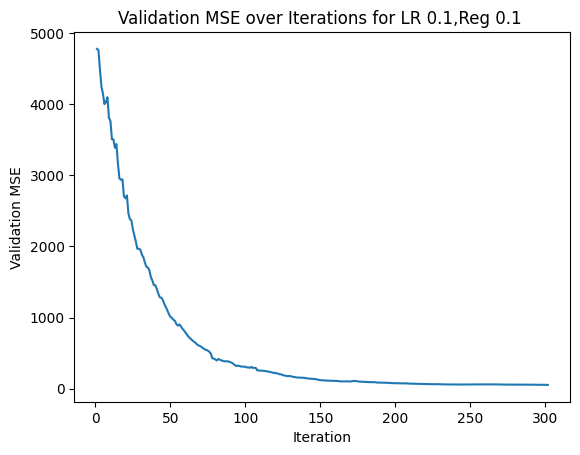

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, iterations + 2), AllvalidMSE)
plt.xlabel("Iteration")
plt.ylabel("Validation MSE")
plt.title("Validation MSE over Iterations for LR 0.1,Reg 0.1 ")
plt.show()

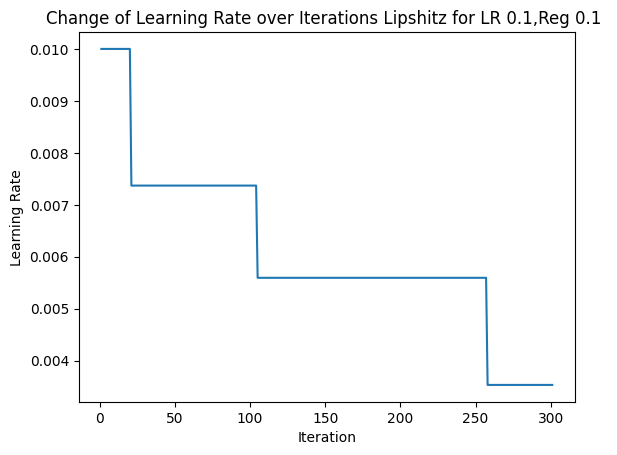

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, iterations + 1), All_lr)
plt.xlabel("Iteration")
plt.ylabel("Learning Rate")
plt.title("Change of Learning Rate over Iterations Lipshitz for LR 0.1,Reg 0.1 ")
plt.show()

In [ ]:
print("The trainMSE is "+str(LinearPrediction(X_train,y_train,Constants,Lambda)))

The trainMSE is 49.6339593103492


In [ ]:
print("The TestMSE is "+str(LinearPrediction(X_test,y_test,Constants,Lambda)))
print("The constants are "+str(Constants))

The TestMSE is 46.61401432008052
The constants are [ 2.76611988 -1.40693343  0.41841936  2.85083555  2.50198946 -5.45564996
 66.79352176]


In [ ]:
sgd=SGDRegressor(early_stopping=True)
sgd.fit(X_train,y_train)
Predictions=sgd.predict(X_test)
ActualValues=y_test.values
MSE=((Predictions-ActualValues)**2).sum()/y_test.shape[0]
print("TH MSE is "+str(MSE))
print("The coeffiecents are "+str(sgd.coef_))
print("The intercept is  "+str(sgd.intercept_))
print(sgd.score(X_test,y_test))

TH MSE is 0.4364345474356935
The coeffiecents are [ 0.28152243 -0.06595216 -0.06596974  0.16289556  0.22502186 -0.46699431]
The intercept is  [0.01463777]
0.5780651922780614


In [ ]:
CountryLife=life.groupby("Country")

In [ ]:
a=[CountryLife.get_group(i) for i in life['Country'].value_counts().keys()]

In [ ]:
for i in a:
    print(i.isna().sum())

Country                            0
Year                               0
Status                             0
Life Expectancy                    0
Adult Mortality                    0
Infant Deaths                      0
Alcohol                            0
Percentage Expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
Under-Five Deaths                  0
Polio                              0
Total Expenditure                  1
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness  1-19 years               0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64
Country                            0
Year                               0
Status                             0
Life Expectancy                    0
Adult Mortality          

Country                            0
Year                               0
Status                             0
Life Expectancy                    0
Adult Mortality                    0
Infant Deaths                      0
Alcohol                            0
Percentage Expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
Under-Five Deaths                  0
Polio                              0
Total Expenditure                  1
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness  1-19 years               0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64
Country                             0
Year                                0
Status                              0
Life Expectancy                     0
Adult Mortality      

Country                            0
Year                               0
Status                             0
Life Expectancy                    0
Adult Mortality                    0
Infant Deaths                      0
Alcohol                            0
Percentage Expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
Under-Five Deaths                  0
Polio                              0
Total Expenditure                  1
Diphtheria                         0
HIV/AIDS                           0
GDP                                1
Population                         0
Thinness  1-19 years               0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64
Country                            0
Year                               0
Status                             0
Life Expectancy                    0
Adult Mortality          

Country                            0
Year                               0
Status                             0
Life Expectancy                    0
Adult Mortality                    0
Infant Deaths                      0
Alcohol                            0
Percentage Expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
Under-Five Deaths                  0
Polio                              0
Total Expenditure                  1
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness  1-19 years               0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64
Country                            0
Year                               0
Status                             0
Life Expectancy                    0
Adult Mortality          

Country                             0
Year                                0
Status                              0
Life Expectancy                     0
Adult Mortality                     0
Infant Deaths                       0
Alcohol                             0
Percentage Expenditure              0
Hepatitis B                         0
Measles                             0
 BMI                                0
Under-Five Deaths                   0
Polio                               0
Total Expenditure                   1
Diphtheria                          0
HIV/AIDS                            0
GDP                                 0
Population                         16
Thinness  1-19 years                0
Thinness 5-9 years                  0
Income composition of resources     0
Schooling                           0
dtype: int64
Country                             0
Year                                0
Status                              0
Life Expectancy                     0

Country                            0
Year                               0
Status                             0
Life Expectancy                    0
Adult Mortality                    1
Infant Deaths                      0
Alcohol                            0
Percentage Expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
Under-Five Deaths                  0
Polio                              0
Total Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         1
Thinness  1-19 years               0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64
Country                            0
Year                               0
Status                             0
Life Expectancy                    0
Adult Mortality          

In [ ]:
life

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
